# Simulated Annealing


## Problem Description

Perfrom analysis, design, and implementation of the **_Simulated Annealing_** (SA) algorithm into a computer program to find the **minimum value** of the function:

$$ f(x_1, x_2) = -\biggl( \sin{(x_1)} \cos{(x_2)} + {\frac{4}{5}} \exp {\biggl(1-\sqrt{x_1^2 + x_2^2}\biggr)} \biggr) $$

with the limits $-10 \leq x_1 \leq 10 $ and $-10 \leq x_2 \leq 10$

In [0]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

## Objective Function

In [0]:
def f(x1, x2):
    return -(
        math.sin(x1) * math.cos(x2) + (4/5) * 
        math.exp(1 - math.sqrt(x1**2 + x2**2))
    )

## Visualizing the Function

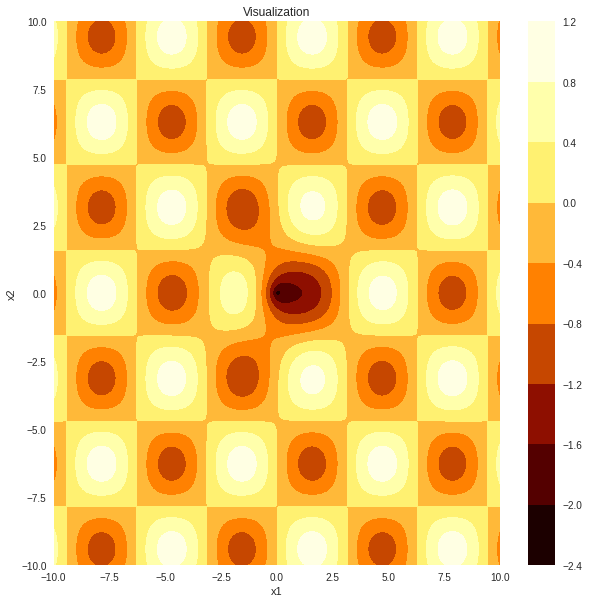

In [3]:
i1 = np.arange(-10, 10, 0.01)
i2 = np.arange(-10, 10, 0.01)

x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)

for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = f(x1m[i][j], x2m[i][j])

plt.figure(figsize=(10, 10))
plt.contourf(x1m, x2m, fm, cmap='afmhot')
plt.title('Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar()

plt.show()

## Generate State

In [0]:
def generate():
    # Initiating random floating number
    return random.uniform(-10, 10)

## Acceptance Probability

In [0]:
def acceptance_probability(delta_E, T):
    # Calculate the acceptence probability for accepting new x1 & x2
    return math.exp(-(delta_E) / T)

## Main Function

In [0]:
# Main function of the simulated annealing algorithm
def simulated_annealing(x1, x2, T): 
    # Making an array to store the result history
    x1_history = []
    x2_history = []
    E_history = []
    
    # Initiating current best solution
    x1_best = x1
    x2_best = x2
    E = E_best = f(x1, x2)
    
    # Loop until temperature decreased to given value
    while T > 0.1e-256:
        # Iterations
        for _ in range(1000) :
            # Generate new solution
            x1_new = generate()
            x2_new = generate()

            # Calculate new cost
            E_new = f(x1_new, x2_new)
            delta_E = E_new - E

            # If the new solution is better than current solution
            if (delta_E <= 0):
                x1 = x1_new
                x2 = x2_new

                E = E_new

                # Check wether the new solution is the current best solution
                if (E_new < E_best):
                    x1_best = x1
                    x2_best = x2
                    E_best = E

            # if the new solution is worse than the current solution
            else:
                P = acceptance_probability(delta_E, T)
                R = random.uniform(0, 1)

                if (R < P):
                    x1 = x1_new
                    x2 = x2_new
                    
                    E = E_new
        
        # Add the current best solution to history array for every annealing schedule
        x1_history.append(x1_best)
        x2_history.append(x2_best)
        E_history.append(E_best)

        # Annealing Schedule
        # Decrase the temperature
        T *= 0.99
    
    # Print the result
    print("Best Solution: ", x1, ", ", x2)
    print("Best Objective: ", E_best)
    
    return x1_history, x2_history, E_history

## Running the Algorithm

In [7]:
# Initiating temperature
T = 10000

# Initiating the value of current value
# Generate state from random value (-10, 10)
x1 = generate()
x2 = generate()

# Store the result
x, y, z = simulated_annealing(x1, x2, T)

Best Solution:  0.0019565259970395488 ,  -0.0008056371052393985
Best Objective:  -2.1719855550539378


## Visualizing the Result History

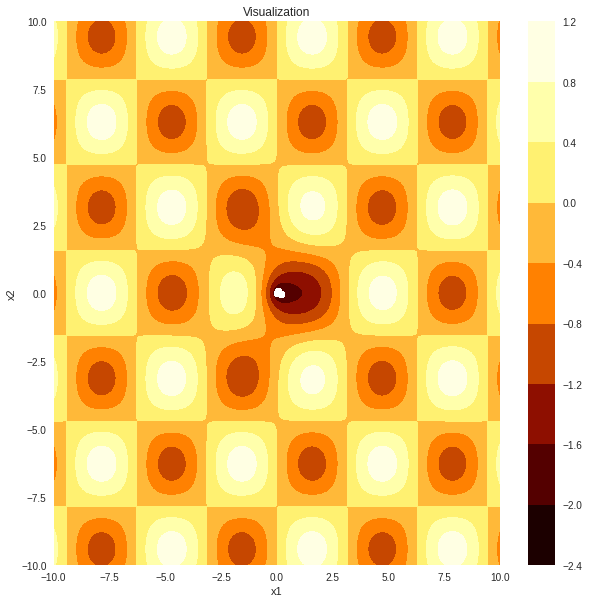

In [8]:
i1 = np.arange(-10, 10, 0.01)
i2 = np.arange(-10, 10, 0.01)

x1m, x2m = np.meshgrid(i1, i2)
fm = np.zeros(x1m.shape)

for i in range(x1m.shape[0]):
    for j in range(x1m.shape[1]):
        fm[i][j] = f(x1m[i][j], x2m[i][j])

plt.figure(figsize=(10, 10))
plt.contourf(x1m, x2m, fm, cmap='afmhot')
plt.title('Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x, y, 'y-o', color='white')
plt.colorbar()

plt.show()

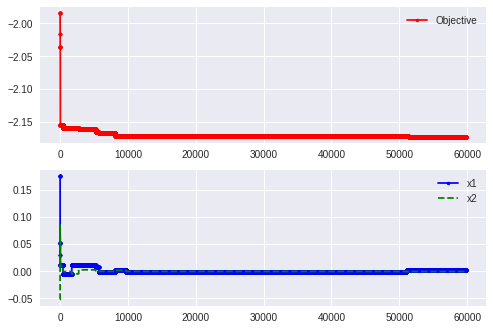

In [9]:
fig = plt.figure()
obj = fig.add_subplot(211)
obj.plot(z,'r.-')
obj.legend(['Objective'])

sol = fig.add_subplot(212)
sol.plot(x,'b.-')
sol.plot(y,'g--')
sol.legend(['x1','x2'])

plt.show()